In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [16]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [17]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6738,3590-TCXTB,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,20.35,No
3495,4988-IQIGL,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.35,75.35,Yes
3808,7785-RDVIG,Female,0,Yes,Yes,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.30,54.7,No
4037,0603-TPMIB,Female,0,Yes,Yes,59,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.45,1534.05,No
2980,5598-IKHQQ,Female,0,No,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.45,1866.45,No
2349,9548-ZMVTX,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),90.45,6565.85,No
4355,0096-BXERS,Female,0,Yes,No,6,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,50.35,314.55,No
4548,5572-ZDXHY,Female,0,No,No,22,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,84.30,1855.65,Yes
29,8773-HHUOZ,Female,0,No,Yes,17,Yes,No,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,64.70,1093.1,Yes
1522,5766-XQXMQ,Female,0,No,No,29,Yes,No,DSL,Yes,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),68.85,1970.5,Yes


In [18]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Section 1.Data Cleaning

In [20]:
pd.to_numeric(df.TotalCharges ,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

'coerce' ignores any errors

In [21]:
df[pd.to_numeric(df.TotalCharges ,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [25]:
df.shape

(7043, 20)

TotalCharges column contains null value so dropping it as they are low in count compared to total count of the dataframe

In [22]:
df_new=df[df.TotalCharges!=' ']

In [23]:
df_new.shape

(7032, 20)

In [30]:
df_new.TotalCharges=pd.to_numeric(df_new.TotalCharges)      


C:\Users\dhanu\AppData\Local\Temp\ipykernel_26764\697775766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.TotalCharges=pd.to_numeric(df_new.TotalCharges)


In [31]:
df_new.dtypes        

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

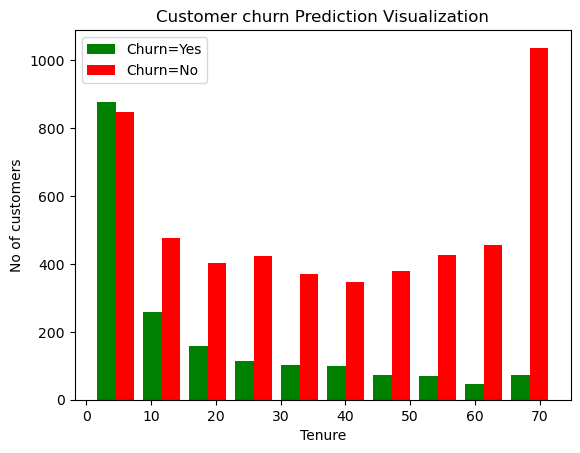

In [40]:
tensure_churn_no=df_new[df_new.Churn=='No'].tenure  #Who don't leave the company
tensure_churn_yes=df_new[df_new.Churn=='Yes'].tenure   #Who leaves the company

plt.xlabel('Tenure')
plt.ylabel('No of customers')
plt.title('Customer churn Prediction Visualization')

plt.hist([tensure_churn_yes,tensure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

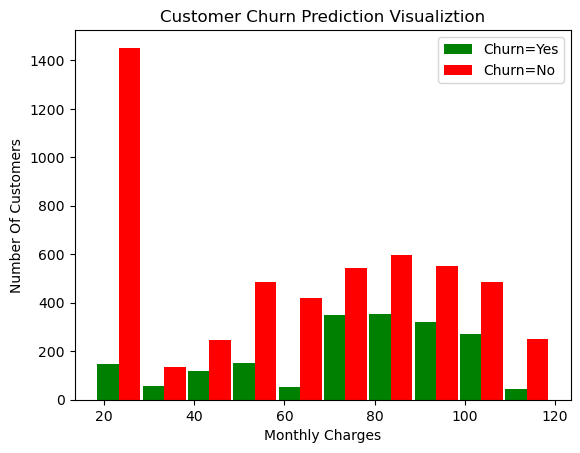

In [43]:
mc_churn_no = df_new[df_new.Churn=='No'].MonthlyCharges      
mc_churn_yes = df_new[df_new.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [53]:
def print_unique_columns(df):
    for column in df:
        if df[column].dtypes=='object':
            print(column,":",df[column].unique())

In [54]:
print_unique_columns(df_new)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [55]:
df_new.replace('No internet service','No',inplace=True)
df_new.replace('No phone service','No',inplace=True)
print_unique_columns(df_new)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


C:\Users\dhanu\AppData\Local\Temp\ipykernel_26764\2134742896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace('No internet service','No',inplace=True)
C:\Users\dhanu\AppData\Local\Temp\ipykernel_26764\2134742896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace('No phone service','No',inplace=True)


In [62]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df_new[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\dhanu\AppData\Local\Temp\ipykernel_26764\522473031.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new[col].replace({'Yes': 1,'No': 0},inplace=True)
C:\Users\dhanu\AppData\Local\Temp\ipykernel_26764\522473031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col].replace({'Yes': 1,'No': 0},inplace=True)


In [68]:
for column in df_new:
    print(column,":",df_new[column].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [69]:
df_new['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\dhanu\AppData\Local\Temp\ipykernel_26764\117467410.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['gender'].replace({'Female':1,'Male':0},inplace=True)
C:\Users\dhanu\AppData\Local\Temp\ipykernel_26764\117467410.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new['gender'

In [74]:
df_new['InternetService'].replace({0:'No'},inplace=True)

C:\Users\dhanu\AppData\Local\Temp\ipykernel_26764\2946493864.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['InternetService'].replace({0:'No'},inplace=True)
C:\Users\dhanu\AppData\Local\Temp\ipykernel_26764\2946493864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['InternetService'].replace({0:'No'},inplace=True)


One hot encoding for the columns which have more than 2 unique values

In [96]:
df1=pd.get_dummies(data=df_new,columns=['InternetService','Contract','PaymentMethod'])

df1

In [98]:
new_array=['InternetService_DSL','InternetService_Fiber optic','InternetService_No','Contract_Month-to-month','Contract_One year','Contract_Two year',
           'PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check',
           'PaymentMethod_Mailed check']
for col in new_array:
    if col in df1.columns:
        df1[col] = df1[col].astype(int)
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


Scaling the columns 'tenure','MonthlyCharges','TotalCharges' between 0 to 1

In [99]:
col_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[col_to_scale]=scaler.fit_transform(df1[col_to_scale])
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [100]:
x=df1.drop('Churn',axis='columns')
y=df1['Churn']

ANN model

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [103]:
x_train.shape

(5625, 26)

# 5625 no of samples, 226 no of columns

In [106]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential(
    [keras.layers.Dense(20,input_shape=(26,),activation='relu'),
     keras.layers.Dense(1,activation='sigmoid'),
     
    ])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100


C:\Users\dhanu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7363 - loss: 0.5674  
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7934 - loss: 0.4339  
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.7960 - loss: 0.4226
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8052 - loss: 0.4136
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8068 - loss: 0.4106  
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 0.4193  
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.7901 - loss: 0.4281
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.8148 - loss: 0.4004
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.8100 - loss: 0.4058
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.7999 - loss: 0.4149
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.7948 - loss: 0.4242
Epoch 12/100
176/176 ━━━━━━━━━━━━

In [107]:
model.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7970 - loss: 0.4380


[0.44799235463142395, 0.7889125943183899]

In [108]:
y_pred=model.predict(x_test)
y_pred[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.256232  ],
       [0.37631905],
       [0.01192237],
       [0.74005044],
       [0.493724  ]], dtype=float32)

In [114]:
y_test[:8]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
Name: Churn, dtype: int64

In [112]:
yp=[]
for element in y_pred:
    if element>0.5:
        yp.append(1)
    else:
        yp.append(0)

In [115]:
yp[:8]

[0, 0, 0, 1, 0, 1, 0, 0]

In [117]:
from sklearn.metrics import confusion_matrix ,classification_report
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.66      0.55      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

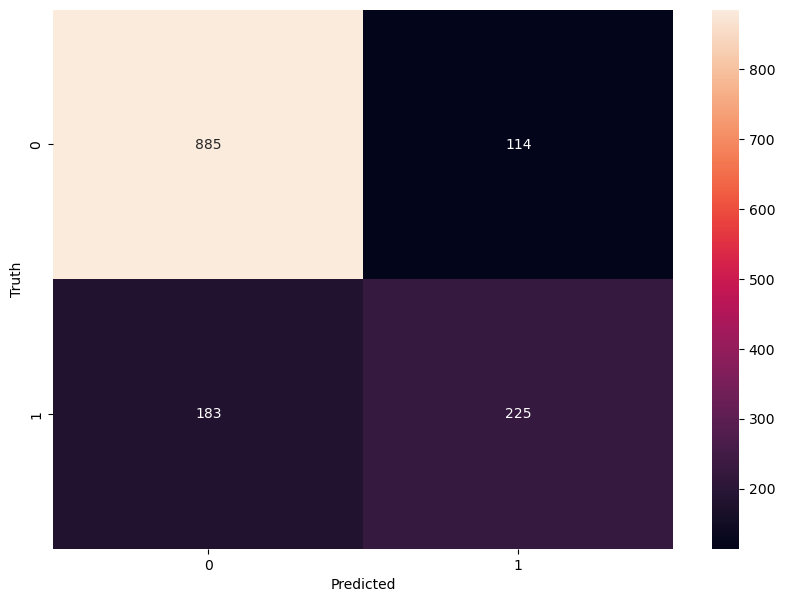

In [118]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=yp)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')